In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
df=pd.read_csv('loan_approved.csv')

In [31]:
df.shape

(614, 13)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [33]:
len(df['Loan_ID'].unique()) # categorical nominal

614

In [34]:
len(df['Gender'].unique()) # categorical nominal

3

In [35]:
len(df['Married'].unique()) # categorical nominal

3

In [36]:
len(df['Dependents'].unique()) # categorical ordinal

5

In [37]:
len(df['Education'].unique()) # categorical nominal

2

In [38]:
len(df['Self_Employed'].unique()) # categorical nominal

3

In [39]:
len(df['ApplicantIncome'].unique()) # continuous numerical

505

In [40]:
len(df['CoapplicantIncome'].unique()) # continuous numerical


287

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

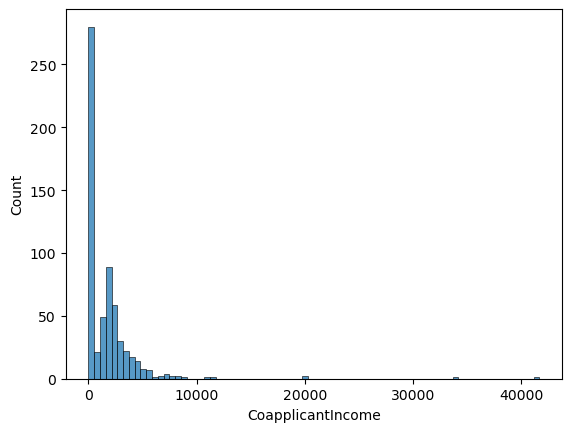

In [41]:
import seaborn as sns

sns.histplot(df['CoapplicantIncome'])

In [42]:
len(df['LoanAmount'].unique()) # continuous numerical

204

In [43]:
len(df['Loan_Amount_Term'].unique()) # discrete numerical

11

In [44]:
len(df['Credit_History'].unique()) # categorical nominal

3

In [45]:
len(df['Property_Area'].unique()) # categorical nominal

3

In [46]:
len(df['Loan_Status (Approved)'].unique()) # categorical nominal

2

In [ ]:

print(df['Gender'].isna().sum())

if df['Gender'].mode().empty:
    df['Gender'].fillna('Unknown')
else:
    df['Gender'].fillna(df['Gender'].mode()[0])

# verify
print(df['Gender'].isna().sum())
print(df['Gender'].value_counts())

0
0
Gender
Male      502
Female    112
Name: count, dtype: int64


In [ ]:

print(df['Married'].isna().sum())

df['Married'].fillna(df['Married'].mode()[0])

# verify
print(df['Married'].isna().sum())
print(df['Married'].value_counts())

3
3
Married
Yes    398
No     213
Name: count, dtype: int64


In [50]:
print("Missing before (Dependents):", df['Dependents'].isna().sum())
if df['Dependents'].mode().empty:
    df['Dependents'].fillna('0', inplace=True)  # or 'Unknown'
else:
    df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
print("Missing after  (Dependents):", df['Dependents'].isna().sum())
print(df['Dependents'].value_counts())

Missing before (Dependents): 15
Missing after  (Dependents): 0
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_26252\2322061427.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)


In [51]:
print("Missing before (Education):", df['Education'].isna().sum())
if df['Education'].mode().empty:
    df['Education'].fillna('Unknown', inplace=True)
else:
    df['Education'].fillna(df['Education'].mode()[0], inplace=True)
print("Missing after  (Education):", df['Education'].isna().sum())
print(df['Education'].value_counts())

Missing before (Education): 0
Missing after  (Education): 0
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_26252\1620609081.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education'].fillna(df['Education'].mode()[0], inplace=True)


In [52]:
print("Missing before (Self_Employed):", df['Self_Employed'].isna().sum())
if df['Self_Employed'].mode().empty:
    df['Self_Employed'].fillna('Unknown', inplace=True)
else:
    df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
print("Missing after  (Self_Employed):", df['Self_Employed'].isna().sum())
print(df['Self_Employed'].value_counts())

Missing before (Self_Employed): 32
Missing after  (Self_Employed): 0
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_26252\1582329934.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


In [53]:
print("Missing before (ApplicantIncome):", df['ApplicantIncome'].isna().sum())
# Option A: fill with mean
# df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean(), inplace=True)
# Option B: fill with median (recommended if skewed)
df['ApplicantIncome'].fillna(df['ApplicantIncome'].median(), inplace=True)
print("Missing after  (ApplicantIncome):", df['ApplicantIncome'].isna().sum())
print(df['ApplicantIncome'].describe())

Missing before (ApplicantIncome): 0
Missing after  (ApplicantIncome): 0
count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


C:\Users\harsh\AppData\Local\Temp\ipykernel_26252\831286454.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ApplicantIncome'].fillna(df['ApplicantIncome'].median(), inplace=True)


In [54]:
print("Missing before (CoapplicantIncome):", df['CoapplicantIncome'].isna().sum())
# Option A: fill with mean
# df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean(), inplace=True)
# Option B: fill with median (recommended if skewed)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].median(), inplace=True)
print("Missing after  (CoapplicantIncome):", df['CoapplicantIncome'].isna().sum())
print(df['CoapplicantIncome'].describe())

Missing before (CoapplicantIncome): 0
Missing after  (CoapplicantIncome): 0
count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


C:\Users\harsh\AppData\Local\Temp\ipykernel_26252\3066601993.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].median(), inplace=True)


In [55]:
print("Missing before (LoanAmount):", df['LoanAmount'].isna().sum())
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
print("Missing after  (LoanAmount):", df['LoanAmount'].isna().sum())
print(df['LoanAmount'].describe())

Missing before (LoanAmount): 22
Missing after  (LoanAmount): 0
count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64


C:\Users\harsh\AppData\Local\Temp\ipykernel_26252\2288676554.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


In [56]:
print("Missing before (Loan_Amount_Term):", df['Loan_Amount_Term'].isna().sum())
# Option: use mode (common) or median
if df['Loan_Amount_Term'].mode().empty:
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
else:
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
print("Missing after  (Loan_Amount_Term):", df['Loan_Amount_Term'].isna().sum())
print(df['Loan_Amount_Term'].value_counts())

Missing before (Loan_Amount_Term): 14
Missing after  (Loan_Amount_Term): 0
Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_26252\376530612.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)


In [57]:
print("Missing before (Credit_History):", df['Credit_History'].isna().sum())
if df['Credit_History'].mode().empty:
    df['Credit_History'].fillna(0, inplace=True)  # or 'Unknown'
else:
    df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
print("Missing after  (Credit_History):", df['Credit_History'].isna().sum())
print(df['Credit_History'].value_counts())

Missing before (Credit_History): 50
Missing after  (Credit_History): 0
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_26252\3249819710.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [58]:
print("Missing before (Property_Area):", df['Property_Area'].isna().sum())
if df['Property_Area'].mode().empty:
    df['Property_Area'].fillna('Unknown', inplace=True)
else:
    df['Property_Area'].fillna(df['Property_Area'].mode()[0], inplace=True)
print("Missing after  (Property_Area):", df['Property_Area'].isna().sum())
print(df['Property_Area'].value_counts())

Missing before (Property_Area): 0
Missing after  (Property_Area): 0
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_26252\2677993274.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Property_Area'].fillna(df['Property_Area'].mode()[0], inplace=True)


In [59]:
print("Missing before (Loan_Status (Approved)):", df['Loan_Status (Approved)'].isna().sum())
if df['Loan_Status (Approved)'].mode().empty:
    df['Loan_Status (Approved)'].fillna('Unknown', inplace=True)
else:
    df['Loan_Status (Approved)'].fillna(df['Loan_Status (Approved)'].mode()[0], inplace=True)
print("Missing after  (Loan_Status (Approved)):", df['Loan_Status (Approved)'].isna().sum())
print(df['Loan_Status (Approved)'].value_counts())

Missing before (Loan_Status (Approved)): 0
Missing after  (Loan_Status (Approved)): 0
Loan_Status (Approved)
Y    422
N    192
Name: count, dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_26252\2289068063.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Status (Approved)'].fillna(df['Loan_Status (Approved)'].mode()[0], inplace=True)


In [60]:
print("Missing before (Loan_ID):", df['Loan_ID'].isna().sum())
df['Loan_ID'].fillna('MissingLoanID', inplace=True)
print("Missing after  (Loan_ID):", df['Loan_ID'].isna().sum())

Missing before (Loan_ID): 0
Missing after  (Loan_ID): 0


C:\Users\harsh\AppData\Local\Temp\ipykernel_26252\3890135570.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_ID'].fillna('MissingLoanID', inplace=True)
